# IART TP on Classification and Supervised ML

In [1]:
import pandas as pd

durty_data = pd.read_csv('iris-data.csv')
print(durty_data.to_string())

     sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm            class
0              5.100             3.5              1.4             0.2      Iris-setosa
1              4.900             3.0              1.4             0.2      Iris-setosa
2              4.700             3.2              1.3             0.2      Iris-setosa
3              4.600             3.1              1.5             0.2      Iris-setosa
4              5.000             3.6              1.4             0.2      Iris-setosa
5              5.400             3.9              1.7             0.4      Iris-setosa
6              4.600             3.4              1.4             0.3      Iris-setosa
7              5.000             3.4              1.5             NaN      Iris-setosa
8              4.400             2.9              1.4             NaN      Iris-setosa
9              4.900             3.1              1.5             NaN      Iris-setosa
10             5.400             3.7       

## Checking the data 
### Checking if data is usable

In [2]:
durty_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Marking missing values

In [3]:
# durty_data = pd.read_csv('iris-data.csv', na_values=['NA'])
durty_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Plotting the data 

/home/marhcouto/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/marhcouto/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/marhcouto/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/marhcouto/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


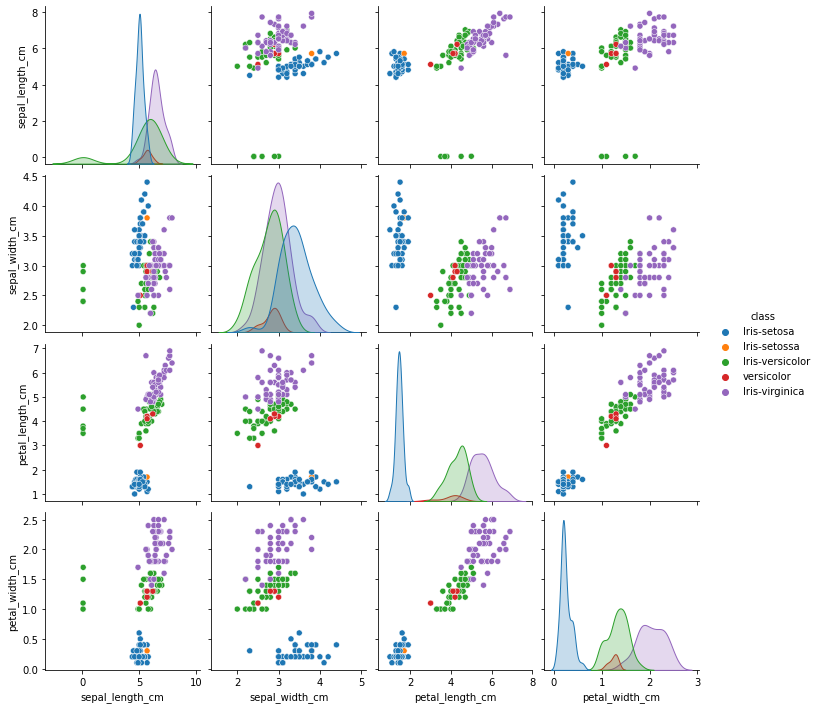

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(durty_data.dropna(), hue='class')

### Issues
- 3 classes instead of 5
- **Outliers**
    - some iris-versicolor entries have very different sepal_length
    - one iris-setosa entry has a very different value for sepal_width
- missing values


## Tidying up

### Solving classes problem
Two of the classes names alude to a simple error in the registry of the data when writing them up. We can clearly see iris-setossa was meant to be iris-setosa and versicolor iris-versicolor

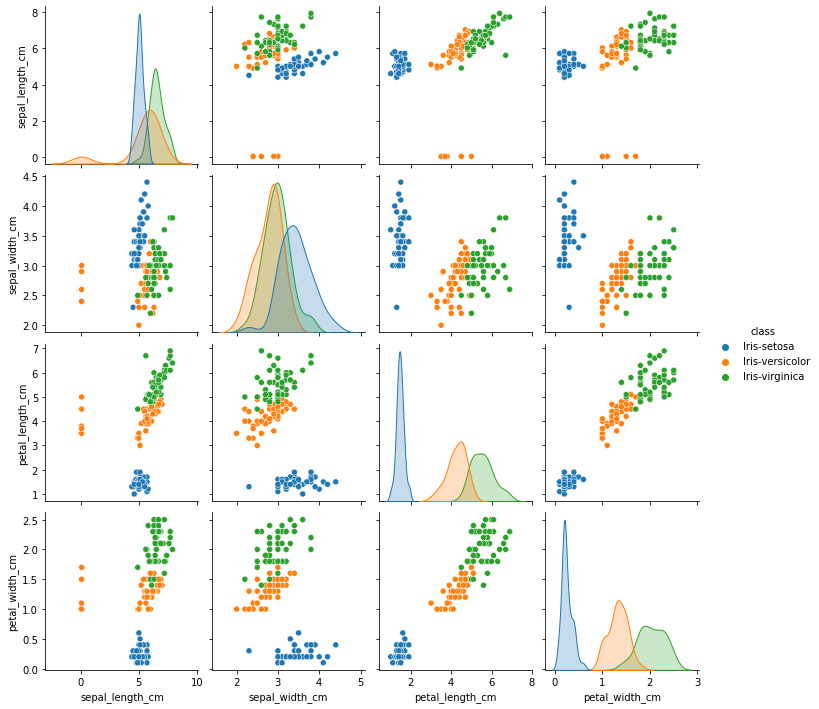

In [5]:
durty_data.loc[durty_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
durty_data.loc[durty_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'
durty_data['class'].unique()
sb.pairplot(durty_data.dropna(), hue='class')

### Solving the sepal_width outlier
There is a clear outlier on sepal_width for Iris-setosa. We will asume it is impossible for this species to have sepal_width smaller than 2.5

<AxesSubplot:>

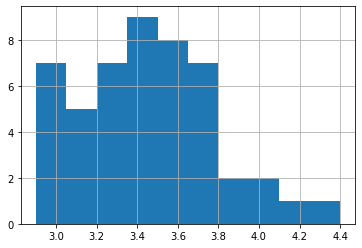

In [6]:
durty_data = durty_data.loc[(durty_data['class'] != 'Iris-setosa') | (durty_data['sepal_width_cm'] >= 2.5)]
durty_data.loc[durty_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

### Solving sepal_length outliers
There were some outliers regarding iris-versicolor entries on sepal_length. We will solve them now.

In [7]:
durty_data.loc[(durty_data['class'] == 'Iris-versicolor') &
              (durty_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


On closer look, they seem to have been result of a registry in the wrong order of magnitude.

<AxesSubplot:>

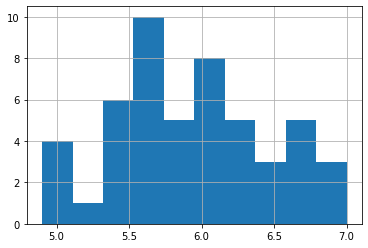

In [8]:
durty_data.loc[(durty_data['class'] == 'Iris-versicolor') &
              (durty_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

durty_data.loc[durty_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

### Solving the missing values problem
One way to deal with missing data is mean imputation (replacing by the value of the mean).

In [10]:
durty_data.loc[(durty_data['sepal_length_cm'].isnull()) |
              (durty_data['sepal_width_cm'].isnull()) |
              (durty_data['petal_length_cm'].isnull()) |
              (durty_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [11]:
average_petal_width = durty_data.loc[durty_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

durty_data.loc[(durty_data['class'] == 'Iris-setosa') &
              (durty_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

durty_data.loc[(durty_data['class'] == 'Iris-setosa') &
              (durty_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [13]:
durty_data.loc[(durty_data['sepal_length_cm'].isnull()) |
              (durty_data['sepal_width_cm'].isnull()) |
              (durty_data['petal_length_cm'].isnull()) |
              (durty_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


All clean

### Save the clean data

In [18]:
durty_data.to_csv('iris-data-clean.csv', index=False)

clean_data = pd.read_csv('iris-data-clean.csv')

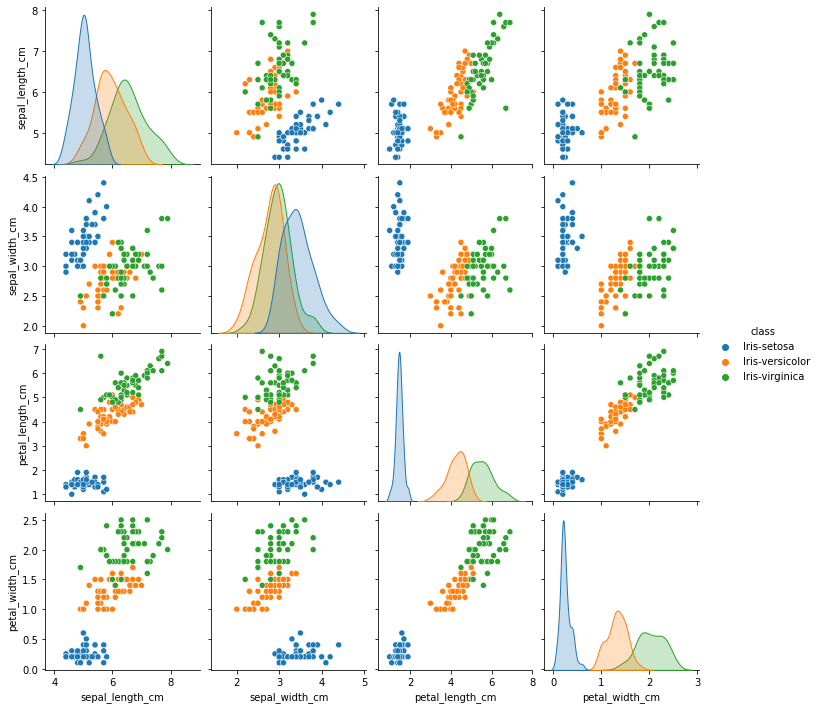

In [19]:
sb.pairplot(clean_data, hue='class')

* Make sure your data is encoded properly

* Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range

* Deal with missing data in one way or another: replace it if you can or drop it

* Never tidy your data manually because that is not easily reproducible

* Use code as a record of how you tidied your data

* Plot everything you can about the data at this stage of the analysis so you can *visually* confirm everything looks correct

## Exploratory Analysis

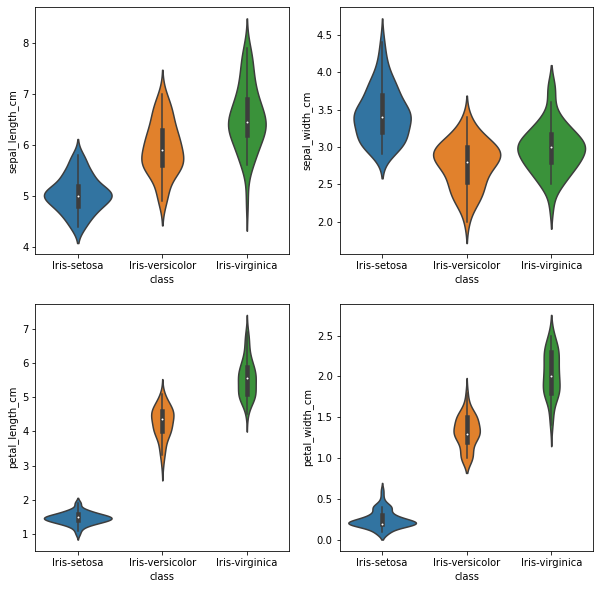

In [22]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(clean_data.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=clean_data)

## Classification

### Dividing into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

all_inputs = clean_data[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values
all_labels = clean_data['class'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

### Training the data set

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

Value seems pretty good (taking into account a minimum of 90% accuracy). However this value is for one case of training and testing sets.

(array([  1.,   3.,   6.,  31.,   0.,  68., 182., 359., 253.,  97.]),
 array([0.78947368, 0.81052632, 0.83157895, 0.85263158, 0.87368421,
        0.89473684, 0.91578947, 0.93684211, 0.95789474, 0.97894737,
        1.        ]),
 <BarContainer object of 10 artists>)

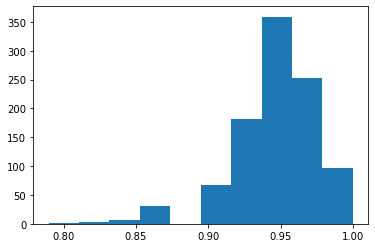

In [25]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)

Our ml model is not so consistent after all. However, simply repeating the training with random training and testing sets is not the best way to evaluate our model.

### Cross-Validation
Cross-Validation will enable us to evaluate in a more reliable way the performance of the model chosen.

Text(0.5, 1.0, 'Average score: 0.96')

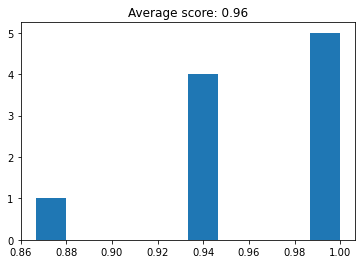

In [27]:
import numpy as np
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

This is a better evaluation of our model's performance.

### Parameter tuning
To increase the performance of a machine learning model, we can tune its parameters. We will use a Grid Search to check the best combination of parameters.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'max_depth': 3, 'max_features': 4}


Text(33.0, 0.5, 'max_depth')

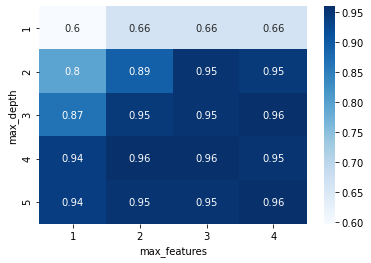

In [30]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Using more than two parameters...

In [31]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9666666666666666
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 3, 'splitter': 'best'}


We now know the parameters that maximize the performance of our algorithm

## Conclusion

In [33]:
import sklearn.tree as tree

decision_tree_classifier = grid_search.best_estimator_

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

### Our decision tree
<img src="iris_dtc.png" />